In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
dataframe = pd.read_csv("diabetes.csv")
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### **Overview of Pima Indian diabetes dataset**

- Preg	Number of times pregnant	Numeric	[0, 17]

- Gluc	Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)	Numeric	[0, 199]

- BP	Diastolic Blood Pressure (mm Hg)	Numeric	[0, 122]

- Skin	Triceps skin fold thickness (mm)	Numeric	[0, 99]

- Insulin	2-Hour Serum insulin (µh/ml)	Numeric	[0, 846]

- BMI	Body mass index [weight in kg/(Height in m)]	Numeric	[0, 67.1]

- DPF	Diabetes pedigree function	Numeric	[0.078, 2.42]

- Age	Age (years)	Numeric	[21, 81]

- Outcome	Binary value indicating non-diabetic /diabetic	Factor	[0,1]

In [3]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = dataframe. iloc[ :, 0:8]
Y = dataframe. iloc[ :, 8]

kfold = StratifiedKFold(n_splits=10, random_state= 3,shuffle=True)

model = RandomForestClassifier(n_estimators= 200, random_state= 20,max_depth=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean())

[0.75324675 0.76623377 0.75324675 0.80519481 0.87012987 0.84415584
 0.74025974 0.68831169 0.72368421 0.77631579]
0.7720779220779221


### Hyper parameter tuning using GridSearchCV

In [4]:
# Use Grid search CV to find best parameters (Hyper parameter tuning) 
from sklearn.model_selection import GridSearchCV 
rf = RandomForestClassifier (random_state=42, n_jobs=-1) 
params = { 
'max_depth': [2,3,5, None], 
'min_samples_leaf': [5,10,20], 
'n_estimators': [50,100,200,500], 
'max_features': ["sqrt","log2", None] 
} 
# Instantiate the grid search model 
grid_search = GridSearchCV (estimator=rf, 
param_grid=params, 
cv = 5, 
n_jobs=-1, verbose=10, scoring="accuracy") 
grid_search.fit(X, Y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=10)

In [6]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 500}
0.7787369493251847


In [7]:
grid_search.best_estimator_

RandomForestClassifier(max_features='log2', min_samples_leaf=5,
                       n_estimators=500, n_jobs=-1, random_state=42)

### Feature Selection using  Random Forest

In [13]:
# Use best estimator hyper parameters obtained above to select important features

model_best = RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                                    min_samples_leaf=5, n_jobs =-1, random_state=42)
model_best.fit(X,Y)
model_best.feature_importances_

array([0.04279647, 0.44093393, 0.0396377 , 0.0225074 , 0.0251669 ,
       0.21364299, 0.08380487, 0.13150974])

In [15]:
X = dataframe.iloc[:,0:8]
X.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [18]:
df = pd.DataFrame(model_best.feature_importances_, columns = ["Importance score"],index = X.columns)
df.sort_values(by = "Importance score", inplace = True, ascending = False,)                  

<BarContainer object of 8 artists>

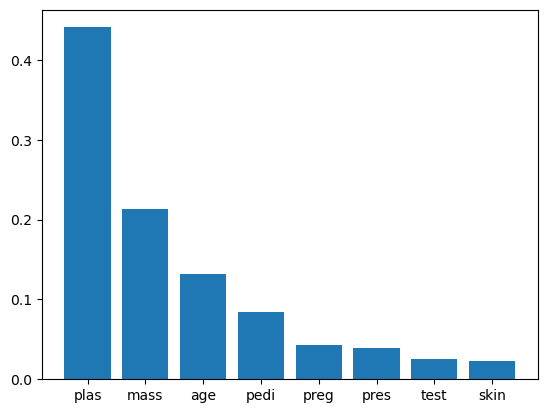

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(df.index, df["Importance score"])